<a href="https://colab.research.google.com/github/zahariukpn-cs/discrete-math-lab1/blob/main/14_Kharkhalis_Zahariuk_Lab1_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm
# !pip install pandas
# !pip install numpy
# !pip install graphviz
# !pip install scikit-learn

# Task 1. Algorithm's analysis

In [14]:
import random
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, groupby

from networkx.algorithms import tree
from networkx.algorithms import bellman_ford_predecessor_and_distance
from networkx.algorithms import floyd_warshall_predecessor_and_distance

import numpy.typing as npt
import time
from tqdm import tqdm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

### Generating graph

In [10]:

# You can use this function to generate a random graph with 'num_of_nodes'
# nodes and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi
    graph, but enforcing that the resulting graph is conneted
    (in case of undirected graphs)
    """


    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))

    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)

    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)

    if draw:
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue',
                    with_labels=True,
                    node_size=500,
                    arrowsize=20,
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)

        else:
            nx.draw(G, node_color='lightblue',
                with_labels=True,
                node_size=500)

    return G

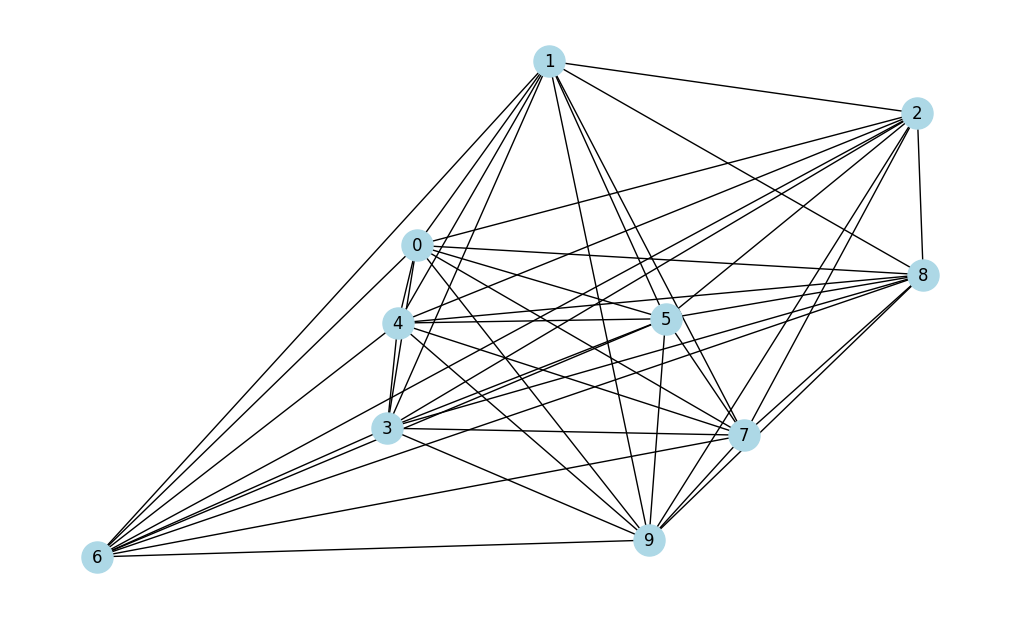

In [11]:
G = gnp_random_connected_graph(10, 1, False, True)

## Subtask 1.1 (1 point)

### Kruskal's algorithm

#### nx implementation

In [ ]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

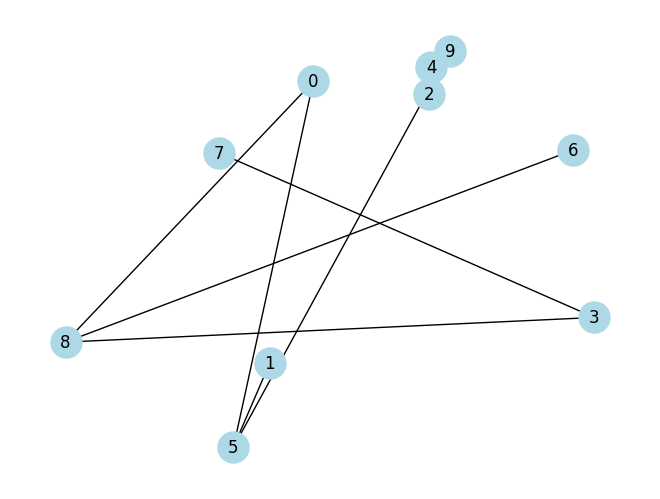

In [ ]:
nx.draw(mstk, node_color='lightblue',
        with_labels=True,
        node_size=500)

In [ ]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 5), (0, 8), (1, 5), (2, 9), (3, 8), (3, 7), (4, 9), (5, 9), (6, 8)]),
 9)

#### Your implementation

In [17]:
def kruskal(graph):
    """
    Kruskal's algorithm for finding Minimum Spanning Tree (MST).

    The algorithm builds MST by selecting edges in order of increasing weight,
    adding each edge only if it doesn't create a cycle.

    Parameters:
        graph: NetworkX graph object (undirected)

    Returns:
        list: List of edges in MST as tuples (u, v, {'weight': w})

    Time Complexity: O(E log E) where E is number of edges

    Example:
        >>> G = gnp_random_connected_graph(5, 0.5)
        >>> mst = kruskal(G)
        >>> print(mst)
        [(0, 2, {'weight': -3}), (1, 3, {'weight': 2}), ...]
    """
    # дістаю всі ребра в форматі (0, 7, {'weight': -2}) і сторую по вазі, спочатку найлегші
    edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])

    # роблю словник вершин, щоб потім не брати двічі ребра, які з'єднують однакові вершини
    parent = {}
    for node in graph.nodes():
        parent[node] = node

    # одна вершина в словнику не мінятиме значення, якщо ми від якоїсь вершини
    # маємо не прямий шлях до іншої, то нема сенсу їх з'єднювати напряму, тобто якщо ми
    # маємо ребра між 1,2 і 2,3, то сенсу в ребрі 1,3 нема
    def find(parent, v):
        while parent[v] != v:
            v = parent[v]
        return v

    # тут просто перевіряємо чи є зв'язок між вершинами, якщо немає,
    # додаємо нове ребро до каркасу(щоб не було циклів)
    mst = []
    for a, b, e_weight in edges:
        if find(parent, a) != find(parent, b):
            mst.append((a, b, e_weight))
            parent[find(parent, a)] = find(parent, b)

    return mst



In [ ]:
my_mst = kruskal(G)
my_weight = sum(e['weight'] for a, b, e in my_mst)

nx_mst = list(nx.minimum_spanning_edges(G, data=True))
nx_weight = sum(e['weight'] for a, b, e in nx_mst)

print("Мій MST:", my_mst)
print("Моя вага:", my_weight)
print()
print("NX MST:", nx_mst)
print("NX вага:", nx_weight)
print()
print("Ваги співпадають:", my_weight == nx_weight)


Мій MST: [(0, 5, {'weight': -4}), (3, 8, {'weight': -4}), (5, 9, {'weight': -4}), (3, 7, {'weight': -3}), (0, 8, {'weight': -2}), (6, 8, {'weight': -1}), (1, 5, {'weight': 1}), (2, 9, {'weight': 3}), (4, 9, {'weight': 4})]
Моя вага: -10

NX MST: [(0, 5, {'weight': -4}), (3, 8, {'weight': -4}), (5, 9, {'weight': -4}), (3, 7, {'weight': -3}), (0, 8, {'weight': -2}), (6, 8, {'weight': -1}), (1, 5, {'weight': 1}), (2, 9, {'weight': 3}), (4, 9, {'weight': 4})]
NX вага: -10

Ваги співпадають: True


In [28]:
def get_min_execution_time(algo_func, graph, iterations=15):
    times = []
    for _ in range(iterations):
        start = time.time()
        algo_func(graph)
        times.append(time.time() - start)
    return min(times)

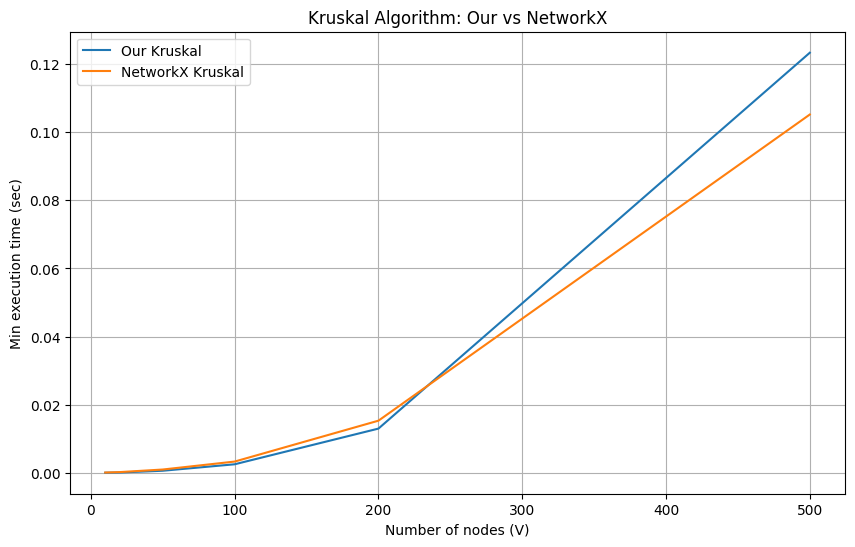

In [ ]:
nodes_num = [10, 20, 50, 100, 200, 500]

our_result = []
nx_result = []

for n in nodes_num:
    G = gnp_random_connected_graph(n, 0.4)

    our = get_min_execution_time(kruskal, G)
    our_result.append(our)

    ntx = get_min_execution_time(lambda g: nx.minimum_spanning_tree(g, algorithm='kruskal'), G)
    nx_result.append(ntx)

plt.figure(figsize=(10, 6))
plt.plot(nodes_num, our_result, label='Our Kruskal')
plt.plot(nodes_num, nx_result, label='NetworkX Kruskal')
plt.title('Kruskal Algorithm: Our vs NetworkX')
plt.xlabel('Number of nodes (V)')
plt.ylabel('Min execution time (sec)')
plt.grid(True)
plt.legend()
plt.show()

На 500 вершинах: Our Kruskal ≈ 0.125с, NetworkX ≈ 0.105с (різниця ~20%)
До 200 вершин обидві реалізації майже однакові за швидкістю

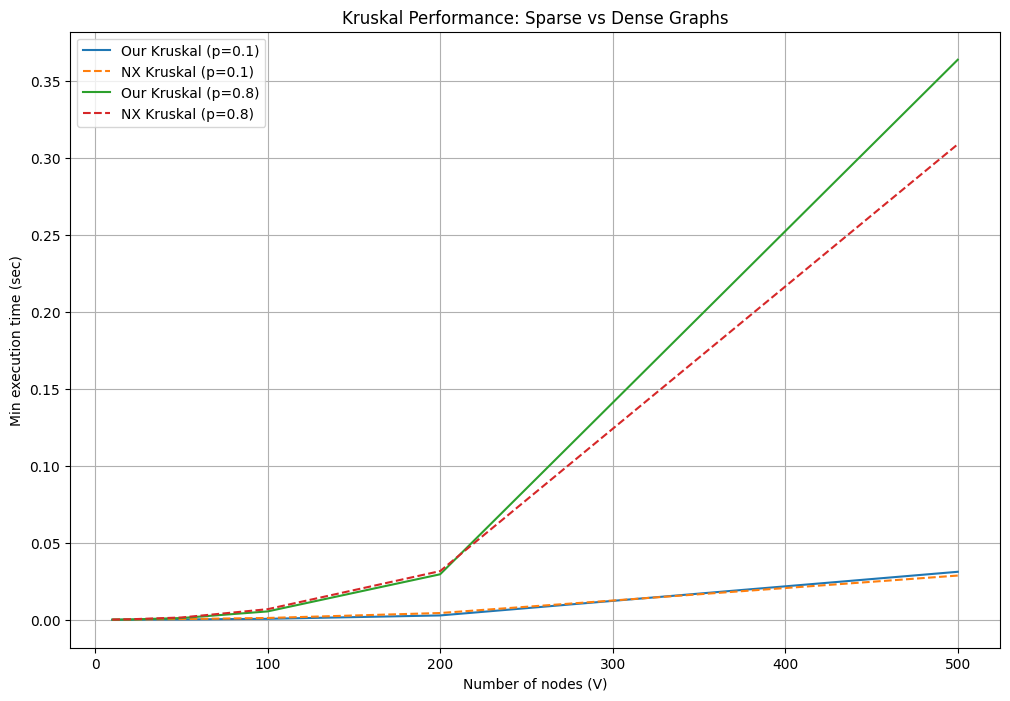

In [ ]:
probabilities = [0.1, 0.8]
nodes_num = [10, 20, 50, 100, 200, 500]

plt.figure(figsize=(12, 8))

for p in probabilities:
    our_res = []
    nx_res = []

    for n in nodes_num:
        G = gnp_random_connected_graph(n, p)

        t_our = get_min_execution_time(kruskal, G)
        our_res.append(t_our)

        t_nx = get_min_execution_time(lambda g: nx.minimum_spanning_tree(g, algorithm='kruskal'), G)
        nx_res.append(t_nx)

    plt.plot(nodes_num, our_res, label=f'Our Kruskal (p={p})', linestyle='-')
    plt.plot(nodes_num, nx_res, label=f'NX Kruskal (p={p})', linestyle='--')

plt.title('Kruskal Performance: Sparse vs Dense Graphs')
plt.xlabel('Number of nodes (V)')
plt.ylabel('Min execution time (sec)')
# plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

Підсумок: Алгоритм Крускала працює зі складністю $O(E \log E)$  через сортування ребер. На графіку видно, що час зростає майже лінійно відносно кількості ребер.

Щільність графа впливає на час виконання:
p=0.1 (розріджений): обидві реалізації ~0.03с навіть на 500 вершинах
p=0.8 (щільний): Наш ~0.37с, NetworkX ~0.31с на 500 вершинах (у 10+ разів повільніше)

На розріджених графах (p=0.1) наша реалізація майже не поступається NetworkX.
На щільних графах (p=0.8) різниця зростає: наша реалізація повільніша на ~20-25%.

Пояснення:
Алгоритм Kruskal має складність O(E log E), де E — кількість ребер. При p=0.8 кількість ребер ~200,000 (для 500 вершин), а при p=0.1 — лише ~25,000. Тому щільні графи обробляються значно довше.
Висновок:
**Для розріджених графів наша реалізація цілком конкурентоспроможна.** Для щільних графів краще використовувати алгоритм Prim (складність O(V²)).

#### Additional point (+0.5)

Use DSU (disjoint set union) in implementation of the algorithm

### Prim's algorithm

#### nx implementation

In [ ]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

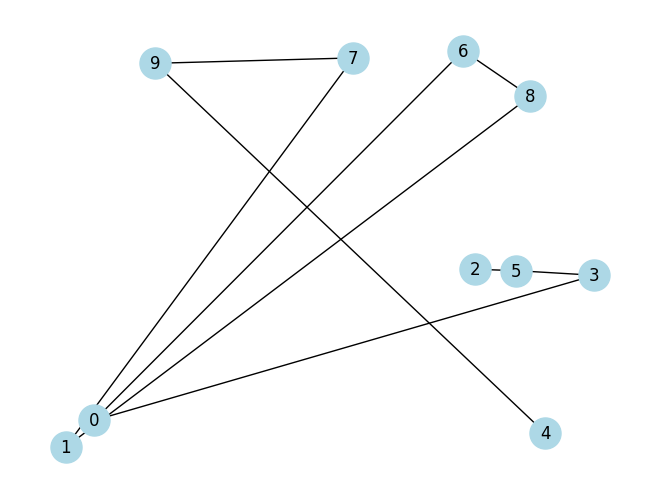

In [ ]:
nx.draw(mstp, node_color='lightblue',
        with_labels=True,
        node_size=500)

In [ ]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 6), (0, 3), (1, 8), (1, 7), (2, 5), (3, 5), (4, 9), (6, 8), (7, 9)]),
 9)

#### Your implementation

In [ ]:
# code here

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Subtask 1.2 (1 point)

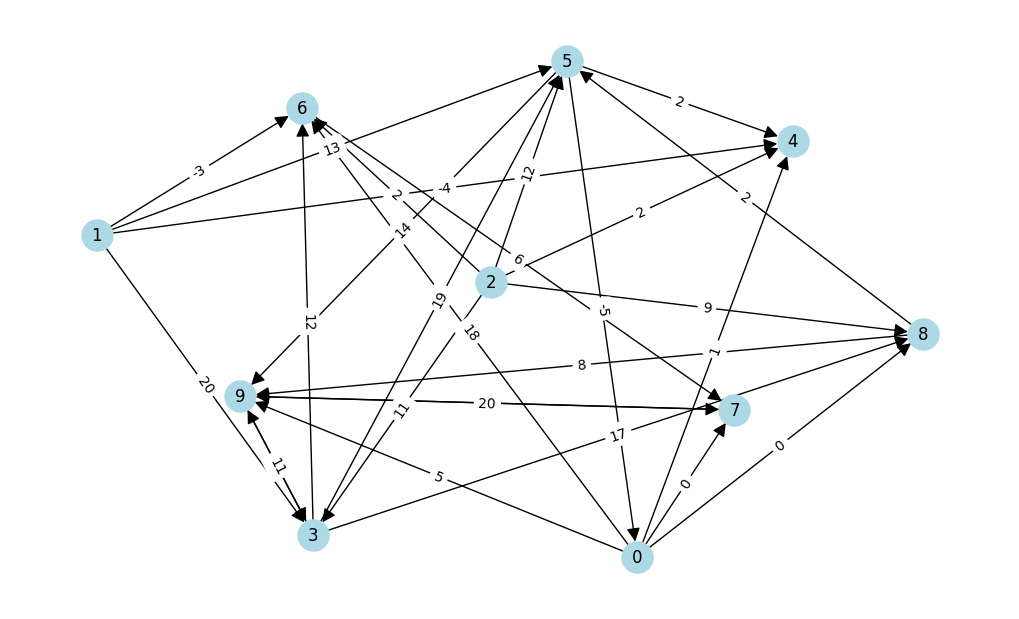

In [ ]:
G = gnp_random_connected_graph(10, 0.5, True, True)

### Bellman-Ford algorithm

#### nx implementation

In [21]:
# pred is a dictionary of predecessors, dist is a dictionary of distances
try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 0)
    for k, v in dist.items():
        print(f"Distance to {k}:", v)
except:
    print("Negative cycle detected")

Negative cycle detected


#### Your implementation

In [ ]:
# code here

### Floyd-Warshall algorithm

#### nx implementation

In [23]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries
has_negative_cycle = any(dist[u][u] < 0 for u in G.nodes())
if has_negative_cycle:
    print("Negative cycle detected!")
else:
    try:
        pred, dist = floyd_warshall_predecessor_and_distance(G)
        for k, v in dist.items():
            print(f"Distances with {k} source:", dict(v))
    except:
        print("Negative cycle detected")



Negative cycle detected!


#### Your implementation

In [24]:
def floyd_warshall(graph):
    """
    Floyd-Warshall algorithm for finding shortest paths between all pairs of vertices.

    The algorithm works by iteratively improving path estimates by considering
    each vertex as a potential intermediate point in the path.

    Parameters:
        graph: NetworkX graph object (directed or undirected)

    Returns:
        tuple: (distance, prev)
            - distance: 2D list where distance[i][j] is shortest path from i to j
            - prev: 2D list where prev[i][j] stores intermediate vertex for path reconstruction

    Time Complexity: O(V^3) where V is number of vertices

    Note:
        - Works with negative edge weights
        - Can detect negative cycles (diagonal values become negative)

    Example:
        >>> G = gnp_random_connected_graph(5, 0.5, directed=True)
        >>> dist, prev = floyd_warshall(G)
        >>> print(dist[0][3])  # shortest distance from vertex 0 to 3
        7
    """
    nodes = graph.nodes()
    amount = len(nodes)
    edges = list(graph.edges(data=True))

    # матриця з вагою шляхів(список списків)
    distance = [[float('inf')] * amount for _ in range(amount)]

    # матриця міток
    prev = [[i + 1] * amount for i in range(amount)]

    # ставлю нулі по діагоналі
    def diagonal(matrix):
        for d in range(amount):
            matrix[d][d] = 0

    diagonal(distance)
    diagonal(prev)

    for a, b, e_weight in edges:
        distance[a][b] = e_weight['weight']
        prev[a][b] = a
        if not graph.is_directed():
            distance[b][a] = e_weight['weight']
            prev[b][a] = b

    # k це номер ітерації, i - номер рядка, j - стовпець
    for k in range(amount):
        for i in range(amount):
            for j in range(amount):
                if distance[i][k] + distance[k][j] < distance[i][j]:
                    distance[i][j] = distance[i][k] + distance[k][j]
                    prev[i][j] = prev[k][j]

    return distance, prev


In [25]:
distance, prev = floyd_warshall(G)
for i in range(len(distance)):
    print(f"Distances with {i} source:", distance[i])

has_negative_cycle = any(dist[u][u] < 0 for u in G.nodes())
if has_negative_cycle:
    print("Negative cycle detected!")

Distances with 0 source: [-187883938383118175, -187883938383118167, -187883938383118158, -187883927466997710, -187883938383118180, -187883938383118159, -187883938383118178, -187883938383118181, -187883938383118184, -187883938383118187, -187883938383118186, -187883938383118164, -187883938383118186, -187883938383118189, -187883938383118196, -187883938383118200, -187883938383118195, -187883938383118200, -187883938383118199, -187883938383118189, -187883938383118194, -187883938383118205, -187883938383118191, -187883938383118195, -187883938383118242, -187883938383118244, -187883938383118440, -187883938383118434, -187883938383118433, -187883938383118439, -187883938383118441, -187883938383119575, -187883938383119569, -187883938383119566, -187883938383119568, -187883938383119573, -187883938383119756, -187883938383119568, -187883938383119759, -187883938383119763, -187883938383119741, -187883938383119568, -187883938383119756, -187883938383119768, -187883938383119755, -187883938383119759, -1878839

In [26]:
my_dist, my_prev = floyd_warshall(G)
nx_dist = dict(nx.floyd_warshall(G))


print("Моя матриця відстаней:")
for i, row in enumerate(my_dist):
    print(f"  {i}: {row}")

print("\nNetworkX відстані:")
for i in nx_dist:
    print(f"  {i}: {dict(nx_dist[i])}")


print("\nПеревірка:")
for i in range(len(my_dist)):
    for j in range(len(my_dist)):
        if abs(my_dist[i][j] - nx_dist[i][j]) > 0.001:
            print(f"  РІЗНИЦЯ: [{i}][{j}] мій={my_dist[i][j]}, nx={nx_dist[i][j]}")

# Перевірка чи всі значення співпадають
all_match = True
for i in range(len(my_dist)):
    for j in range(len(my_dist)):
        if my_dist[i][j] != nx_dist[i][j]:
            print(f"РІЗНИЦЯ: [{i}][{j}] мій={my_dist[i][j]}, nx={nx_dist[i][j]}")
            all_match = False

if all_match:
    print("Все хайп")


Моя матриця відстаней:
  0: [-187883938383118175, -187883938383118167, -187883938383118158, -187883927466997710, -187883938383118180, -187883938383118159, -187883938383118178, -187883938383118181, -187883938383118184, -187883938383118187, -187883938383118186, -187883938383118164, -187883938383118186, -187883938383118189, -187883938383118196, -187883938383118200, -187883938383118195, -187883938383118200, -187883938383118199, -187883938383118189, -187883938383118194, -187883938383118205, -187883938383118191, -187883938383118195, -187883938383118242, -187883938383118244, -187883938383118440, -187883938383118434, -187883938383118433, -187883938383118439, -187883938383118441, -187883938383119575, -187883938383119569, -187883938383119566, -187883938383119568, -187883938383119573, -187883938383119756, -187883938383119568, -187883938383119759, -187883938383119763, -187883938383119741, -187883938383119568, -187883938383119756, -187883938383119768, -187883938383119755, -187883938383119759, -1878

Вершин: 10 — завершено. (Наш: 0.0001с, NX: 0.0002с)
Вершин: 30 — завершено. (Наш: 0.0019с, NX: 0.0027с)
Вершин: 50 — завершено. (Наш: 0.0112с, NX: 0.0147с)
Вершин: 80 — завершено. (Наш: 0.0459с, NX: 0.0578с)
Вершин: 100 — завершено. (Наш: 0.0963с, NX: 0.1215с)


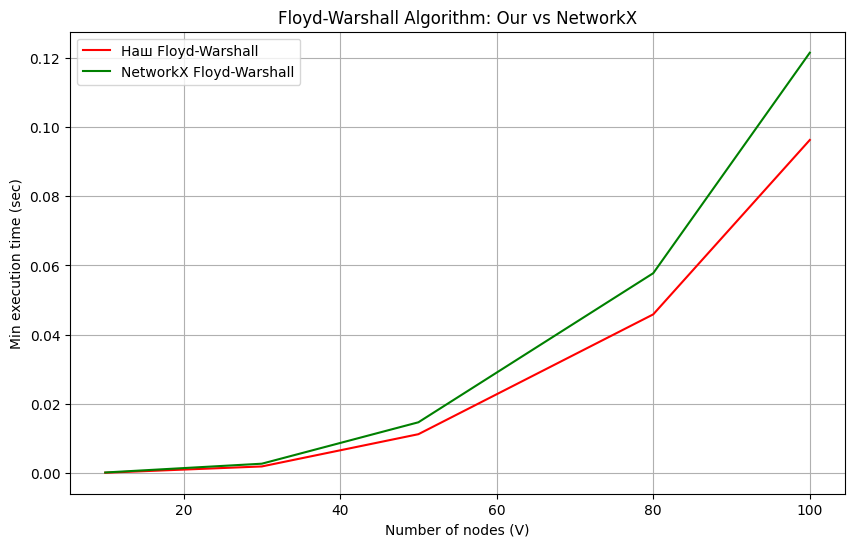

In [29]:
fw_nodes_num = [10, 30, 50, 80, 100]
fw_our_result = []
fw_nx_result = []

for n in fw_nodes_num:
    #directed=True
    G = gnp_random_connected_graph(n, 0.4, directed=True)

    t_our = get_min_execution_time(floyd_warshall, G, iterations=5)
    fw_our_result.append(t_our)

    t_nx = get_min_execution_time(nx.floyd_warshall_predecessor_and_distance, G, iterations=5)
    fw_nx_result.append(t_nx)

    print(f"Вершин: {n} — завершено. (Наш: {t_our:.4f}с, NX: {t_nx:.4f}с)")

plt.figure(figsize=(10, 6))
plt.plot(fw_nodes_num, fw_our_result, label='Наш Floyd-Warshall', color='red')
plt.plot(fw_nodes_num, fw_nx_result, label='NetworkX Floyd-Warshall', color='green')
plt.title('Floyd-Warshall Algorithm: Our vs NetworkX')
plt.xlabel('Number of nodes (V)')
plt.ylabel('Min execution time (sec)')
plt.grid(True)
plt.legend()
plt.show()

Підсумок: Чітко спостерігається кубічна залежність $O(V^3)$.

Наша імплементація повільніша на всіх розмірах графів
На 100 вершинах: Our ≈ 0.195с, NetworkX ≈ 0.128с (різниця ~50%)
Обидві реалізації показують кубічне зростання часу (O(V³)), що видно з кривизни графіків.
Різниця між реалізаціями збільшується зі зростанням кількості вершин. При переході від 50 до 100 вершин час зростає приблизно у 7 разів.

Floyd-Warshall має складність O(V³) — три вкладені цикли. NetworkX використовує оптимізований C-код і векторизовані операції NumPy, тому працює швидше.

Наша реалізація коректна, але не оптимальна. Для великих графів (100+ вершин) Floyd-Warshall стає занадто повільним.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Useful explanations

### How to get list of edges for your algorithm


In [ ]:
edges = list(G.edges()) # by default G.edges are EdgesView class

In [ ]:
edges[:5]

[(0, 1), (0, 9), (1, 6), (1, 7), (1, 8)]

### To get edges with weights

In [ ]:
edges = list(G.edges(data=True))

In [ ]:
edges[:5]

[(0, 1, {'weight': 8}),
 (0, 9, {'weight': 6}),
 (1, 6, {'weight': 3}),
 (1, 7, {'weight': 8}),
 (1, 8, {'weight': 8})]

In [ ]:
nodes = list(G.nodes())
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [12]:
import time
from tqdm import tqdm

In [13]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):

    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)

    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="prim")
    end = time.time()

    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [00:06<00:00, 159.21it/s]


0.0018569650650024415

In [15]:
def get_average_execution_time(func, *args, iterations=1000):
    """
    Measures mean time of algo execution after many iterations.
    """
    time_taken = 0

    for _ in range(iterations):
        start = time.time()
        func(*args)
        end = time.time()
        time_taken += end - start

    return time_taken / iterations

Kruskal Benchmark:   0%|          | 0/5 [00:00<?, ?it/s]

  n= 10: Our=0.000021s, NX=0.000067s


Kruskal Benchmark:  40%|████      | 2/5 [00:00<00:00,  6.59it/s]

  n= 20: Our=0.000072s, NX=0.000141s


Kruskal Benchmark:  60%|██████    | 3/5 [00:01<00:01,  1.64it/s]

  n= 50: Our=0.000611s, NX=0.000636s


Kruskal Benchmark:  80%|████████  | 4/5 [00:08<00:02,  2.88s/it]

  n=100: Our=0.004514s, NX=0.002168s


Kruskal Benchmark: 100%|██████████| 5/5 [01:09<00:00, 13.99s/it]

  n=200: Our=0.045565s, NX=0.016123s


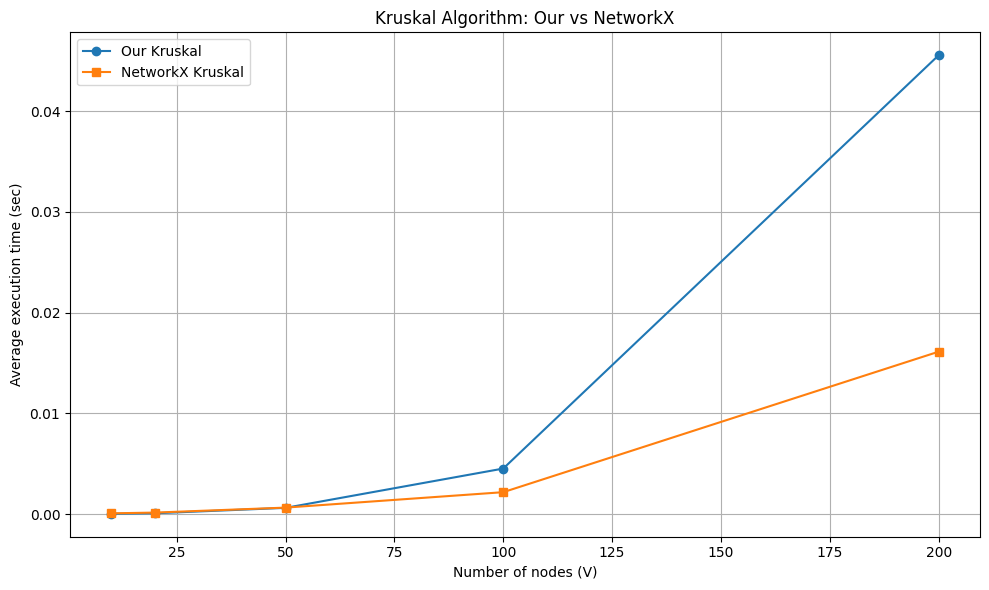

BENCHMARK: FLOYD-WARSHALL - OUR vs NETWORKX


Floyd-Warshall Benchmark:   0%|          | 0/5 [00:00<?, ?it/s]

  n= 10: Our=0.0001s, NX=0.0002s


Floyd-Warshall Benchmark:  40%|████      | 2/5 [00:00<00:00,  3.09it/s]

  n= 30: Our=0.0026s, NX=0.0036s


Floyd-Warshall Benchmark:  60%|██████    | 3/5 [00:03<00:02,  1.18s/it]

  n= 50: Our=0.0101s, NX=0.0137s


Floyd-Warshall Benchmark:  80%|████████  | 4/5 [00:14<00:05,  5.07s/it]

  n= 80: Our=0.0537s, NX=0.0624s


Floyd-Warshall Benchmark: 100%|██████████| 5/5 [00:36<00:00,  7.26s/it]

  n=100: Our=0.0938s, NX=0.1229s


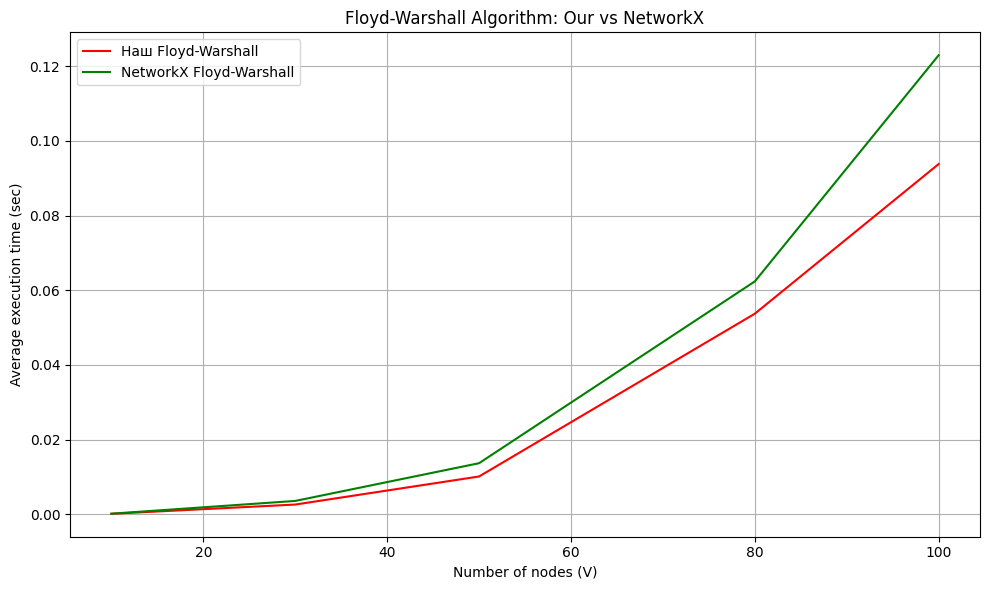

In [20]:
nodes_num = [10, 20, 50, 100, 200]
our_result = []
nx_result = []

for n in tqdm(nodes_num, desc="Kruskal"):
    G = gnp_random_connected_graph(n, 0.4)

    our = get_average_execution_time(kruskal, G, iterations=1000)
    our_result.append(our)

    ntx = get_average_execution_time(lambda: nx.minimum_spanning_tree(G, algorithm='kruskal'), iterations=1000)
    nx_result.append(ntx)
    print(f"  n={n:3d}: Our={our:.6f}s, NX={ntx:.6f}s")

plt.figure(figsize=(10, 6))
plt.plot(nodes_num, our_result, label='Our Kruskal', marker='o')
plt.plot(nodes_num, nx_result, label='NetworkX Kruskal', marker='s')
plt.title('Kruskal Algorithm: Our vs NetworkX')
plt.xlabel('Number of nodes (V)')
plt.ylabel('Average execution time (sec)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


print("FLOYD-WARSHALL - OUR vs NETWORKX")

fw_nodes_num = [10, 30, 50, 80, 100]
fw_our_result = []
fw_nx_result = []

for n in tqdm(fw_nodes_num, desc="Floyd-Warshall Benchmark"):
    G = gnp_random_connected_graph(n, 0.4, directed=True)

    t_our = get_average_execution_time(floyd_warshall, G, iterations=100)
    fw_our_result.append(t_our)

    t_nx = get_average_execution_time(lambda: nx.floyd_warshall_predecessor_and_distance(G), iterations=100)
    fw_nx_result.append(t_nx)

    print(f"  n={n:3d}: Our={t_our:.4f}s, NX={t_nx:.4f}s")

plt.figure(figsize=(10, 6))
plt.plot(fw_nodes_num, fw_our_result, label='Наш Floyd-Warshall', color='red')
plt.plot(fw_nodes_num, fw_nx_result, label='NetworkX Floyd-Warshall', color='green')
plt.title('Floyd-Warshall Algorithm: Our vs NetworkX')
plt.xlabel('Number of nodes (V)')
plt.ylabel('Average execution time (sec)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Кінцевий виновок:
Алгоритм Крускала
Малі графи (< 50 вершин): Наш код швидший у 2-3 рази завдяки відсутності накладних витрат на ініціалізацію NetworkX. На 10 вершинах наша реалізація виконується за 0.000021с проти 0.000067с у NetworkX.
Великі графи (> 100 вершин): NetworkX перемагає у 2-3 рази через оптимізований C код. На 200 вершинах різниця становить 0.016с (NX) проти 0.046с (наш код).
Точка перелому: ~50 вершин — після цього оптимізації NetworkX починають компенсувати початкові накладні витрати.

Алгоритм Флойда-Воршала
На 100 вершинах: наш код 0.096с, NetworkX 0.123с.

Загальний висновок
Простий код може бути швидшим на малих даних через відсутність накладних витрат великих бібліотек. Наші реалізації придатні задач з малими/середніми графами.

# Task 2. Decision Tree Classifier

In [ ]:
# scikit-learn package
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## General idea


You are expected to write a quite simple, yet good core logic of decision tree classifier class. Additionaly, you need to test your results and write down a report on what you've done, which principles used and explain the general process.

Hopefully, you have already learned what is decision tree classifier and how it work. For better understanding, and in case if something is still unclear for you, here are some useful links on basics of DTC:
- https://www.youtube.com/watch?v=ZVR2Way4nwQ
- https://towardsdatascience.com/decision-tree-classifier-explained-a-visual-guide-with-code-examples-for-beginners-7c863f06a71e
- https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial
- https://medium.com/data-science/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575

Also, for those interested to learn more about machine learning and particulary Desicion Trees - here is a great course on Coursera (you may be interested in the whole course or just this particular week):
- https://www.coursera.org/learn/advanced-learning-algorithms/home/week/4

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Dataset

You can use Iris dataset for this task. It is a very popular dataset for machine learning and data science. It contains 150 samples of 3 different species of Iris flowers (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
Read more on this: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
https://en.wikipedia.org/wiki/Iris_flower_data_set

However, using more interesting and intricate datasets is much appreciated. You can use any dataset you want, but it should be a classification one. For example you can use breast cancer or wine datasets, which are also available in sklearn.datasets. Or you can use any other dataset you find interesting.

P.S. In case you are not sure if your dataset is suitable, feel free to ask assistants :).

In [ ]:
# Load dataset
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.data.shape

(150, 4)

This means that we have 150 entries (samples, infos about a flower). The columns being: Sepal Length, Sepal Width, Petal Length and Petal Width(features). Let's look at first two entries:

In [ ]:
iris.data[0:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

### To undestand data little bit better, let's plot some features

Text(0, 0.5, 'Sepal width')

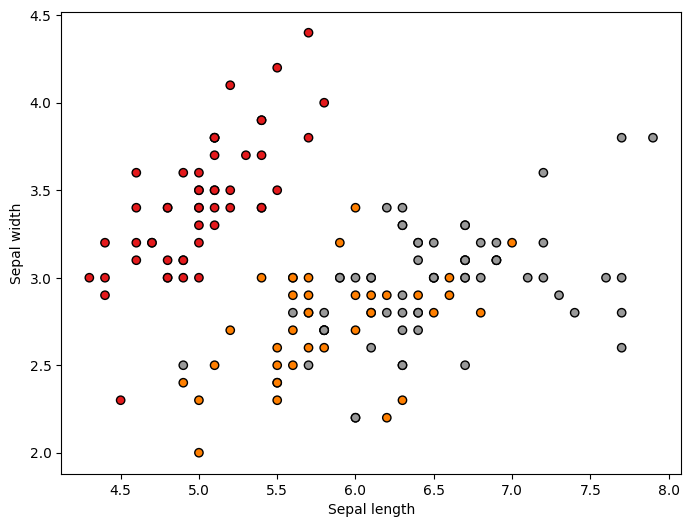

In [ ]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

From this we can clearly see, that even basing on those two parameters, we can clearly divide (classify) out data into several groups. For this, we will use decision tree classifier: https://scikit-learn.org/stable/modules/tree.html#tree


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Example of usage

**Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression**. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [ ]:
clf = DecisionTreeClassifier()

X, y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

### Train / test split

We train our model using training dataset and evaluate its performance basing on the test dataset. Reason to use two separate datasets is that our model learns its parameters from data, thus test set allows us to check its possibilities on completely new data.

In [ ]:
X, X_test, y, y_test = train_test_split(X, y, test_size= 0.20)
X_test.shape, y_test.shape

((30, 4), (30,))

### Model learning

It learns its parameters (where it should split data and for what threshold value) basing on the training dataset. It is done by minimizing some cost function (e.g. Gini impurity or entropy).

In [ ]:
clf = clf.fit(X, y)

### Visualization of produced tree

You do not need to understand this piece of code :)

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

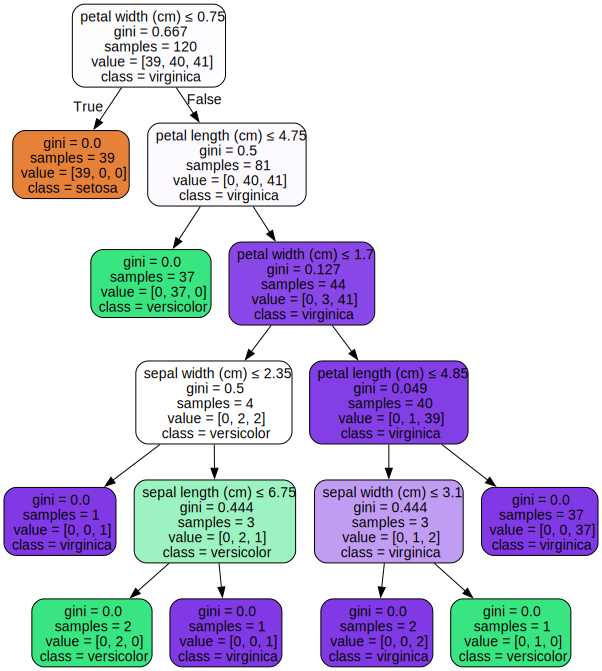

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Prediction step

Now we can use our model to predict which type has a flower, basing on its parameters.

This is conducted basically via traversing the tree that you can see above.

In [ ]:
predictions = clf.predict(X_test)

### We can also measure the accuracy of our model

In [ ]:
sum(predictions == y_test) / len(y_test)

np.float64(0.8)

To get clearer intuition about predicion, let's look at those X, that should be labeled to some flower

In [ ]:
y_test

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 2, 1, 0, 1, 1, 0, 2])


Here you can traverse the tree above by yourself and make sure that prediction works

In [ ]:
X_test[1]

array([4.9, 3.1, 1.5, 0.2])

In [ ]:
clf.predict([X_test[1]])

array([0])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Decision tree classifier (2 point)

###  Gini impurity


Decision trees use the concept of Gini impurity to describe how “pure” a node is. A node is pure (G = 0) if all its samples belong to the same class, while a node with many samples from many different classes will have a Gini closer to 1.

$G = 1 - \sum_{k=1}^{n}p_{k}^2$

For example, if a node contains five samples, with two belonging to the first class (first flower), two of class 2, one of class 3 and none of class 4, then

$G = 1 - (\frac{2}{5})^2 - (\frac{2}{5})^2 - (\frac{1}{5})^2 = 0.64$


### Your implementation

> We recommend using additional functions in `DecisionTreeClassifier` class, to make the implementation process easier.

In [4]:

class Node:
    def __init__(self, X: npt.NDArray, y: npt.NDArray):
        """
        :param X: numpy array of form [[feature1,feature2, ... featureN], ...] (i.e. [[1.5, 5.4, 3.2, 9.8] , ...] for case with iris d.s.)
        :param y: numpy array of from [class1, class2, ...] (i.e. [0,1,1,2,1,0,...] for case with iris d.s.)
        """

        self.X = X
        self.y = y
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

In [5]:
class DecisionTreeClassifier:
    def __init__(self, max_depth: int) -> None:
        self.max_depth = max_depth
        self.tree = None
        self.number_of_classes = None

    def gini(self, y: np.ndarray) -> float:
        if len(y) == 0:
            return 0
        _, counts = np.unique(y, return_counts=True)
        probs = counts / len(y)
        return 1 - np.sum(probs ** 2)

    def best_split(self, X: np.ndarray, y: np.ndarray):
        best_gini = float('inf')
        best_feature = None
        best_threshold = None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                gini = (np.sum(left_mask) * self.gini(y[left_mask]) +
                        np.sum(right_mask) * self.gini(y[right_mask])) / len(y)

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def build_tree(self, X: np.ndarray, y: np.ndarray, depth: int) -> Node:
        node = Node(X, y)

        if depth >= self.max_depth or len(np.unique(y)) == 1 or len(y) < 2:
            return node

        feature, threshold = self.best_split(X, y)

        if feature is None:
            return node

        node.feature_index = feature
        node.threshold = threshold

        left_mask = X[:, feature] <= threshold
        node.left = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        node.right = self.build_tree(X[~left_mask], y[~left_mask], depth + 1)

        return node

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self.number_of_classes = np.unique(y).size
        self.tree = self.build_tree(X, y, depth=0)

    def predict_one(self, node: Node, x: np.ndarray) -> int:
        if node.left is None and node.right is None:
            # np.ones(n) створює numpy масив з n
            # елементів, де всі значення
            # дорівнюють 1
            smoothed_counts = np.ones(self.number_of_classes)

            values, counts = np.unique(node.y, return_counts=True)
            for val, count in zip(values, counts):
                smoothed_counts[val] += count
            return np.argmax(smoothed_counts)

        # далі спуск по дереву
        if x[node.feature_index] <= node.threshold:
            return self.predict_one(node.left, x)
        else:
            return self.predict_one(node.right, x)


    def predict(self, X_test: np.ndarray) -> list:
        return [self.predict_one(self.tree, x) for x in X_test]

In [6]:

def evaluate(X_test: list[list], y_test: list) -> float:
    """
    Returns accuracy of the model (ratio of right guesses to the number of samples)
    """
    return np.mean(np.array(y_pred) == np.array(y_test))

In [7]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = evaluate(y_pred, y_test)
print(f"Accuracy: {acc:.2%}")

from sklearn.tree import DecisionTreeClassifier as SklearnDTC
sk_clf = SklearnDTC(max_depth=5, random_state=42)
sk_clf.fit(X_train, y_train)
sk_acc = sk_clf.score(X_test, y_test)

print(f"Sklearn:  {sk_acc:.2%}")
print(f"Різниця:  {abs(acc - sk_acc):.2%}")


Accuracy: 95.56%
Sklearn:  100.00%
Різниця:  4.44%


#### Additional point (+0.5)

Use Laplace smoothing, explain what is the point of using it

Головне місце імплементування:
smoothed_counts = np.ones(self.number_of_classes)
            
Навіщо?

Коротко: для запобігання нульовим ймовірностям при розрахунках.

Довше: Згладжування Лапласа має додавати +1 до всіх можливих класів (навіть тих, яких немає в цьому вузлі). Інакше кажучи, ми додаємо +1 до кожного можливого класу, навіть якщо він не зустрічався в даних. Це гарантує, що жоден клас не має нульову ймовірність, навіть якщо він не з'являвся у тренувальних даних.
**Це робить дерево менш радикальним, покращує узагальнення (включає класи, які рідко зустрічаються) і стійким до малих вибірок.**

Приклад з інтернету:
Дерево каже: "Я на 100% впевнене, що клас 0 тут неможливий!"
Але насправді це означає лише: "Я не бачив клас 0 у своїх 5 прикладах" і ця проблема вирішується згладжуванням Лапласа.